# Standard Data Wrangling Commands

***R, version 0.9***

Anton Antonov  
[RakuForPrediction-book at GitHub](https://github.com/antononcube/RakuForPrediction-book)  
[SimplifiedMachineLearningWorkflows-book at GitHub](https://github.com/antononcube/SimplifiedMachineLearningWorkflows-book)  
September 2022


------

## Introduction

This document demonstrates and exemplifies the abilities of the Raku package
["DSL::English::DataQueryWorkflow"](https://raku.land/zef:antononcube/DSL::English::DataQueryWorkflows), [AAp1],
to produce executable Python code that fits majority of the data wrangling use cases.

The examples should give a good idea of the English-based Domain Specific Language (DSL) utilized by [AAp1].

The data wrangling in R is done with the package ["tidyverse"](https://www.tidyverse.org).

This notebook has examples that were used in the presentation
["Multi-language Data-Wrangling Conversational Agent"](https://www.youtube.com/watch?v=pQk5jwoMSxs), [AAv1].
That presentation is an introduction to data wrangling from a more general, multi-language perspective.

*It is assumed that the readers of this notebook are familiar with the general data processing workflow discussed in the presentation [AAv1].*

For detailed introduction into data wrangling (with- and in Raku) see the article
["Introduction to data wrangling with Raku"](https://rakuforprediction.wordpress.com/2021/12/31/introduction-to-data-wrangling-with-raku/), [AA1].
(And its Bulgarian version [AA2].)

Some of the datasets are acquired with the package
["ExampleDatasets"](https://pypi.org/project/ExampleDatasets/).

The data wrangling sections have two parts: a code generation part, and an execution steps part.

### Generated code

- Jupyter notebooks allow the invocation of shell commands and the definition of command aliases. Both of these features are leveraged.
- The Raku package [AAp1] is utilized in this Jupyter notebook through package's Command Line Interface (CLI) script `ToDataQueryWorkflowCode`.
- Additionally, the CLI script `ToDataQueryWorkflowCode` allows its code results to be copied to the clipboard of the host Operating System (OS).


------

## Setup

### Shell alias

Define an "alias" function for the UNIX (macOS or Linux) Command Line Interface (CLI) program `ToDataQueryWorkflowCode`:

In [1]:
FromDSL <- function(command, target="R::tidyverse" ) { system(paste0("ToDataQueryWorkflowCode ", target, " '", command ,"'"), intern=TRUE) }

Try out the "alias":

In [2]:
FromDSL("use dfTitanic; group by class", "R::base")

[1] "obj <- dfTitanic ;"                     "obj <- split( x = obj, f = \"class\" )"

### Load packages

In [3]:
library(tidyverse)
library(purrr)
library(magrittr)
library(skimr)
library(ggplot2)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




### Load data

#### Titanic data

We can obtain the Titanic dataset provided by project ["MathematicaVsR"](https://github.com/antononcube/MathematicaVsR):

In [4]:
dfTitanic <- read.csv("https://raw.githubusercontent.com/antononcube/MathematicaVsR/master/Data/MathematicaVsR-Data-Titanic.csv");
dim(dfTitanic)

[1] 1309    5

#### Anscombe's quartet

The dataset named
["Anscombe's quartet"](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
has four datasets that have nearly identical simple descriptive statistics,
yet have very different distributions and appear very different when graphed.

Anscombe's quartet is (usually) given in a table with eight columns that is somewhat awkward to work with.
Below we demonstrate data transformations that make plotting of the four datasets easier.
The DSL specifications used make those data transformations are programming language independent.

We can obtain the Anscombe's dataset using the function `example_dataset` provided by "ExampleDatasets", [AAp4]:

In [5]:
dfAnscombe <- read.csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/anscombe.csv")
dim(dfAnscombe)

[1] 11  9

#### Star Wars films data
We can obtain Star Wars films datasets using (again) the function example-dataset:

In [6]:
dfStarwars <- read.csv("https://raw.githubusercontent.com/antononcube/R-packages/master/DataQueryWorkflowsTests/inst/extdata/dfStarwars.csv")
dfStarwarsFilms <- read.csv("https://raw.githubusercontent.com/antononcube/R-packages/master/DataQueryWorkflowsTests/inst/extdata/dfStarwarsFilms.csv")
dfStarwarsStarships <- read.csv("https://raw.githubusercontent.com/antononcube/R-packages/master/DataQueryWorkflowsTests/inst/extdata/dfStarwarsStarships.csv")
dfStarwarsVehicles <- read.csv("https://raw.githubusercontent.com/antononcube/R-packages/master/DataQueryWorkflowsTests/inst/extdata/dfStarwarsVehicles.csv")

Here are the dimensions of the obtained data frames:

In [7]:
purrr::map_df( c("dfStarwars", "dfStarwarsFilms", "dfStarwarsStarships", "dfStarwarsVehicles"), function(x) c(Dataset = x, Dimensions = dim(get(x))) ) 

Dataset,Dimensions1,Dimensions2
<chr>,<chr>,<chr>
dfStarwars,87,11
dfStarwarsFilms,173,2
dfStarwarsStarships,31,2
dfStarwarsVehicles,13,2


------

## Multi-language translation

In this section show that the Raku package "DSL::English::DataQueryWorkflows" generates code for multiple programming languages.
Also, it translates the English DSL into DSLs of other natural languages.

### Programming languages

In [8]:
command0 = "use dfTitanic; group by passengerClass; counts;"
purrr::map_df(c("Julia::DataFrames", "Python::pandas", "R::base", "R::tidyverse",  "Raku::Reshapers", "WL"), 
              function(x) { c(Language = x, Code = paste(FromDSL(command0, target=x), collapse="\n")) })

Language,Code
<chr>,<chr>
Julia::DataFrames,"obj = dfTitanic obj = groupby( obj, [:passengerClass] ) obj = combine(obj, nrow)"
Python::pandas,"obj = dfTitanic.copy() obj = obj.groupby([""passengerClass""]) obj = obj.size()"
R::base,"obj <- dfTitanic ; obj <- split( x = obj, f = ""passengerClass"" ) ; obj = length(obj)"
R::tidyverse,dfTitanic %>% dplyr::group_by(passengerClass) %>% dplyr::count()
Raku::Reshapers,"$obj = dfTitanic ; $obj = group-by($obj, ""passengerClass"") ; $obj = $obj>>.elems"
WL,"obj = dfTitanic; obj = GroupBy[ obj, #[""passengerClass""]& ]; obj = Map[ Length, obj]"


### Natural languages

In [9]:
purrr::map_df(c("Bulgarian", "Korean", "Russian",  "Spanish"), 
              function(x) { c(Language = x, Code = paste(FromDSL(command0, target=x), collapse="\n")) })

Language,Code
<chr>,<chr>
Bulgarian,използвай таблицата: dfTitanic групирай с колоните: passengerClass намери броя
Korean,테이블 사용: dfTitanic 열로 그룹화: passengerClass 하위 그룹의 크기 찾기
Russian,использовать таблицу: dfTitanic групировать с колонками: passengerClass найти число
Spanish,"utilizar la tabla: dfTitanic agrupar con columnas: ""passengerClass"" encontrar recuentos"


------

## Using `ToDataQueryWorkflowCode`

The Raku package "DSL::English::DataQueryWorkflows", [AAp1], provides the Command Line Interface (CLI) script `ToDataQueryWorkflowCode`.
That script has optional arguments that control its output.

Here is script's usage message:

In [10]:
system("ToDataQueryWorkflowCode --help", intern=T)

[1] "Translates natural language commands into data transformations programming code."                                                                                             
 [2] "Usage:"                                                                                                                                                                       
 [3] "  ToDataQueryWorkflowCode [-t|--target=<Str>] [-l|--language=<Str>] [-f|--format=<Str>] [-c|--clipboard-command=<Str>] <command> -- Main CLI signature."                      
 [4] "  ToDataQueryWorkflowCode [-l|--language=<Str>] [-f|--format=<Str>] [-c|--clipboard-command=<Str>] <target> <command> -- Easier target specification."                        
 [5] "  ToDataQueryWorkflowCode [-t|--target=<Str>] [-l|--language=<Str>] [-f|--format=<Str>] [-c|--clipboard-command=<Str>] [<words> ...] -- Command given as a sequence of words."
 [6] "  "                                                                                                                                                                           
 [7] "    <command>                       A string with one or many commands (separated by ';')."                                                                                   
 [8] "    -t|--target=<Str>               Target (programming language with optional library spec.) [default: 'Whatever']"                                                          
 [9] "    -l|--language=<Str>             The natural language to translate from. [default: 'English']"                                                                             
[10] "    -f|--format=<Str>               The format of the output, one of 'Whatever', 'code', 'hash', or 'raku'. [default: 'Whatever']"                                            
[11] "    -c|--clipboard-command=<Str>    Clipboard command to use. [default: 'Whatever']"                                                                                          
[12] "    <target>                        Programming language."                                                                                                                    
[13] "    [<words> ...]                   Words of a data query."                                                                                                                   
[14] ""                                                                                                                                                                             
[15] ""                                                                                                                                                                             
[16] "Details:"                                                                                                                                                                     
[17] "    If --target is 'Whatever' then:"                                                                                                                                          
[18] "        1. It is attempted to use the environmental variable RAKU_DSL_DATAQUERYWORKFLOWS_TARGET"                                                                              
[19] "        2. If RAKU_DSL_DATAQUERYWORKFLOWS_TARGET is not defined then 'R::tidyverse' is used."                                                                                 
[20] "    If --clipboard-command is the empty string then no copying to the clipboard is done."                                                                                     
[21] "    If --clipboard-command is 'Whatever' then:"                                                                                                                               
[22] "        1. It is attempted to use the environment variable CLIPBOARD_COPY_COMMAND."                                                                                           
[23] "            I

------

## Trivial workflow

In this section we demonstrate code generation and execution results for very simple (and very frequently used) sequence of data wrangling operations.

### Code generation

For the simple specification:

In [11]:
command0 = "
use dfTitanic;
group by passengerClass;
show counts;
"

We generate target code with `ToDataQueryWorkflowCode` using the alias `to_pandas` defined above:

In [12]:
FromDSL(command0)

[1] "dfTitanic %>%"                                      "dplyr::group_by(passengerClass) %>%"               
[3] "( function(x) { print(x %>% dplyr::count()); x } )"

Here is the execution and result of the aliased shell command:

In [13]:
dfTitanic %>%
dplyr::group_by(passengerClass) %>%
( function(x) { print(x %>% dplyr::count()); x } )

# A tibble: 3 × 2
# Groups:   passengerClass [3]
  passengerClass     n
  <chr>          <int>
1 1st              323
2 2nd              277
3 3rd              709


id,passengerClass,passengerAge,passengerSex,passengerSurvival
<int>,<chr>,<int>,<chr>,<chr>
1,1st,30,female,survived
2,1st,0,male,survived
3,1st,0,female,died
4,1st,30,male,died
5,1st,20,female,died
6,1st,50,male,survived
7,1st,60,female,survived
8,1st,40,male,died
9,1st,50,female,survived


**Remark:** Executing the commands above puts the generated code into the clipboard of the Operating System (OS).

### Execution steps (R)

Get the dataset into a "pipeline object":

In [14]:
obj  <- dfTitanic
skimr::skim(obj)

── Data Summary ────────────────────────
                           Values
Name                       obj   
Number of rows             1309  
Number of columns          5     
_______________________          
Column type frequency:           
  character                3     
  numeric                  2     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
  skim_variable     n_missing complete_rate min max empty n_unique whitespace
1 passengerClass            0             1   3   3     0        3          0
2 passengerSex              0             1   4   6     0        2          0
3 passengerSurvival         0             1   4   8     0        2          0

── Variable type: numeric ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Warning message in is.null(text_repr) || nchar(text_repr) == 0L:
“'length(x) = 2 > 1' in coercion to 'logical(1)'”


,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,character,passengerClass,0,1,3,3,0,3,0,NA,NA,NA,NA,NA,NA,NA,NA
2,character,passengerSex,0,1,4,6,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA
3,character,passengerSurvival,0,1,4,8,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA
4,numeric,id,0,1,NA,NA,NA,NA,NA,655.00000,378.02006,1,328,655,982,1309,▇▇▇▇▇
5,numeric,passengerAge,0,1,NA,NA,NA,NA,NA,23.55004,18.05924,-1,10,20,40,80,▅▇▂▂▁


Group by column:

In [15]:
obj <- 
    obj %>% 
    dplyr::group_by(passengerClass)

Print the group sizes of the "pipeline object":

In [16]:
obj %>% summarise(n())

passengerClass,n()
<chr>,<int>
1st,323
2nd,277
3rd,709


------

## Cross tabulation

[Cross tabulation](https://en.wikipedia.org/wiki/Contingency_table) is a fundamental data wrangling operation. For the related transformations to long- and wide-format see the section "Complicated and neat workflow".

### Code generation

Here we define a command that filters the Titanic dataset and then makes cross-tabulates:

In [17]:
command1 = '
use dfTitanic;
filter with passengerSex is "male" and passengerSurvival equals "died" or passengerSurvival is "survived" ;
cross tabulate passengerClass, passengerSurvival over passengerAge;
take pipeline value
'

In [18]:
FromDSL(command1)

[1] "dfTitanic %>%"                                                                                                                           
[2] "dplyr::filter(passengerSex == \"male\" & passengerSurvival == \"died\" | passengerSurvival == \"survived\") %>%"                         
[3] "(function(x) as.data.frame(xtabs( formula = passengerAge ~ passengerClass + passengerSurvival, data = x ), stringsAsFactors=FALSE )) %>%"
[4] "as.data.frame()"

#### Execution

In [19]:
dfTitanic %>%
dplyr::filter(passengerSex == "male" & passengerSurvival == "died" | passengerSurvival == "survived") %>%
(function(x) as.data.frame(xtabs( formula = passengerAge ~ passengerClass + passengerSurvival, data = x ), stringsAsFactors=FALSE )) %>%
as.data.frame()

passengerClass,passengerSurvival,Freq
<chr>,<chr>,<int>
1st,died,4290
2nd,died,4419
3rd,died,7562
1st,survived,6671
2nd,survived,2776
3rd,survived,2720


### Execution steps (tidyverse)

Copy the Titanic data into a "pipeline object" and show its dimensions and a sample of it:


In [20]:
obj <- dfTitanic
dim(obj)
head(obj)

[1] 1309    5

,id,passengerClass,passengerAge,passengerSex,passengerSurvival
,<int>,<chr>,<int>,<chr>,<chr>
1,1,1st,30,female,survived
2,2,1st,0,male,survived
3,3,1st,0,female,died
4,4,1st,30,male,died
5,5,1st,20,female,died
6,6,1st,50,male,survived


Filter the data and show the number of rows in the result set:

In [21]:
obj  <- 
    obj %>% 
    dplyr::filter(passengerSex == "male" & passengerSurvival == "died" | passengerSurvival == "survived")

dim(obj)

[1] 1182    5

Cross tabulate and show the result:

In [22]:
obj %>% (function(x) as.data.frame(xtabs( formula = passengerAge ~ passengerClass + passengerSurvival, data = x ), stringsAsFactors=FALSE ))

passengerClass,passengerSurvival,Freq
<chr>,<chr>,<int>
1st,died,4290
2nd,died,4419
3rd,died,7562
1st,survived,6671
2nd,survived,2776
3rd,survived,2720


------

## Mutation with formulas

In this section we discuss formula utilization to mutate data. We show how to use column references.

Special care has to be taken when the specifying data mutations with formulas that reference to columns in the dataset.

The code corresponding to the `transform ...` line in this example produces
*expected* result for the target "R::tidyverse":

In [23]:
command2 = "
use data frame dfStarwars;
keep the columns name, homeworld, mass & height;
transform with bmi = `mass/height^2*10000`;
filter rows by bmi >= 30 & height < 200;
arrange by the variables mass & height descending"

In [24]:
FromDSL(command2)

[1] "dfStarwars %>%"                                   "dplyr::select(name, homeworld, mass, height) %>%" "dplyr::mutate(bmi = mass/height^2*10000) %>%"    
[4] "dplyr::filter(bmi >= 30 & height < 200) %>%"      "dplyr::arrange(desc(mass), desc(height))"

In [25]:
dfStarwars %>%
dplyr::select(name, homeworld, mass, height) %>%
dplyr::mutate(bmi = mass/height^2*10000) %>%
dplyr::filter(bmi >= 30 & height < 200) %>%
dplyr::arrange(desc(mass), desc(height))

name,homeworld,mass,height,bmi
<chr>,<chr>,<dbl>,<int>,<dbl>
Jabba Desilijic Tiure,Nal Hutta,1358,175,443.42857
Owen Lars,Tatooine,120,178,37.87401
Bossk,Trandosha,113,190,31.30194
Jek Tono Porkins,Bestine IV,110,180,33.95062
Dud Bolt,Vulpter,45,94,50.92802
Sebulba,Malastare,40,112,31.88776
R5-D4,Tatooine,32,97,34.00999
R2-D2,Naboo,32,96,34.72222
Yoda,NA,17,66,39.02663


**Remark:** Note that we have to use single quotes for the command invocation; using double quotes will invoke the string interpolation feature.

------

## Grouping awareness

In this section we discuss the treatment of multiple "group by" invocations within the same DSL specification.

### Code generation

Since there is no expectation to have a dedicated data transformation monad -- in whatever programming language -- we can try to make the command sequence parsing to be "aware" of the grouping operations.

In the following example before applying the grouping operation in fourth line we have to flatten the data (which is grouped in the second line):

In [26]:
command3 = "
use dfTitanic;
group by passengerClass;
echo counts;
group by passengerSex;
show counts
"

In [27]:
FromDSL(command3)

[1] "dfTitanic %>%"                                          "dplyr::group_by(passengerClass) %>%"                   
[3] "( function(x) { print(x %>% dplyr::count()); x } ) %>%" "dplyr::group_by(passengerSex) %>%"                     
[5] "( function(x) { print(x %>% dplyr::count()); x } )"

### Execution

Here we execute the generated code:

In [28]:
dfTitanic %>%
dplyr::group_by(passengerClass) %>%
( function(x) { print(x %>% dplyr::count()); x } ) %>%
dplyr::group_by(passengerSex) %>%
( function(x) { print(x %>% dplyr::count()); x } )

# A tibble: 3 × 2
# Groups:   passengerClass [3]
  passengerClass     n
  <chr>          <int>
1 1st              323
2 2nd              277
3 3rd              709
# A tibble: 2 × 2
# Groups:   passengerSex [2]
  passengerSex     n
  <chr>        <int>
1 female         466
2 male           843


id,passengerClass,passengerAge,passengerSex,passengerSurvival
<int>,<chr>,<int>,<chr>,<chr>
1,1st,30,female,survived
2,1st,0,male,survived
3,1st,0,female,died
4,1st,30,male,died
5,1st,20,female,died
6,1st,50,male,survived
7,1st,60,female,survived
8,1st,40,male,died
9,1st,50,female,survived


### Execution steps (tidyverse)

First grouping:

In [29]:
obj <- 
dfTitanic %>%
dplyr::group_by(passengerClass) %>%
( function(x) { print(x %>% dplyr::count()); x } )

# A tibble: 3 × 2
# Groups:   passengerClass [3]
  passengerClass     n
  <chr>          <int>
1 1st              323
2 2nd              277
3 3rd              709


Here we do the second grouping and print-out the group sizes:

In [30]:
obj %>%
dplyr::group_by(passengerSex) %>%
( function(x) { print(x %>% dplyr::count()); x } )

# A tibble: 2 × 2
# Groups:   passengerSex [2]
  passengerSex     n
  <chr>        <int>
1 female         466
2 male           843


id,passengerClass,passengerAge,passengerSex,passengerSurvival
<int>,<chr>,<int>,<chr>,<chr>
1,1st,30,female,survived
2,1st,0,male,survived
3,1st,0,female,died
4,1st,30,male,died
5,1st,20,female,died
6,1st,50,male,survived
7,1st,60,female,survived
8,1st,40,male,died
9,1st,50,female,survived


------

## Non-trivial workflow

In this section we generate and demonstrate data wrangling steps that clean, mutate, filter, group, and summarize a given dataset.

### Code generation


In [31]:
command4 = '
use dfStarwars;
show dimensions;
echo summary;
replace missing in mass and hight with 0;
filter by birth_year greater than 27;
select homeworld, mass and height;
group by homeworld;
show counts;
summarize the variables mass and height with mean and median
'

In [32]:
FromDSL(command4)

[1] "dfStarwars %>%"                                                                                 
[2] "( function(x) { print(dim(x)); x } ) %>%"                                                       
[3] "( function(x) { print(summary(x)); x } ) %>%"                                                   
[4] "tidyr::replace_na(list(mass = 0, hight = 0)) %>%"                                               
[5] "dplyr::filter(birth_year > 27) %>%"                                                             
[6] "dplyr::select(homeworld, mass, height) %>%"                                                     
[7] "dplyr::group_by(homeworld) %>%"                                                                 
[8] "( function(x) { print(x %>% dplyr::count()); x } ) %>%"                                         
[9] "dplyr::summarise_at( .vars = c(\"mass\", \"height\"), .funs = c(mean = mean, median = median) )"

### Execution

In [33]:
dfStarwars %>%
( function(x) { print(dim(x)); x } ) %>%
( function(x) { print(summary(x)); x } ) %>%
tidyr::replace_na(list(mass = 0, hight = 0)) %>%
dplyr::filter(birth_year > 27) %>%
dplyr::select(homeworld, mass, height) %>%
dplyr::group_by(homeworld) %>%
( function(x) { print(x %>% dplyr::count()); x } ) %>%
dplyr::summarise_at( .vars = c("mass", "height"), .funs = c(mean = mean, median = median) )

[1] 87 11
     name               height           mass          hair_color         skin_color         eye_color           birth_year         sex           
 Length:87          Min.   : 66.0   Min.   :  15.00   Length:87          Length:87          Length:87          Min.   :  8.00   Length:87         
 Class :character   1st Qu.:167.0   1st Qu.:  55.60   Class :character   Class :character   Class :character   1st Qu.: 35.00   Class :character  
 Mode  :character   Median :180.0   Median :  79.00   Mode  :character   Mode  :character   Mode  :character   Median : 52.00   Mode  :character  
                    Mean   :174.4   Mean   :  97.31                                                            Mean   : 87.57                     
                    3rd Qu.:191.0   3rd Qu.:  84.50                                                            3rd Qu.: 72.00                     
                    Max.   :264.0   Max.   :1358.00                                                         

homeworld,mass_mean,height_mean,mass_median,height_median
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Alderaan,0.0,191.0,0.0,191.0
Bespin,79.0,175.0,79.0,175.0
Cerea,82.0,198.0,82.0,198.0
Chandrila,0.0,150.0,0.0,150.0
Concord Dawn,79.0,183.0,79.0,183.0
Corellia,80.0,180.0,80.0,180.0
Coruscant,0.0,170.0,0.0,170.0
Dathomir,80.0,175.0,80.0,175.0
Eriadu,0.0,180.0,0.0,180.0


### Execution steps (tidyverse)

Here is code that cleans the data of missing values, and shows dimensions and summary (corresponds to the three four lines above):

In [34]:
obj <- 
dfStarwars %>%
( function(x) { print(dim(x)); x } ) %>%
( function(x) { print(summary(x)); x } ) %>%
tidyr::replace_na(list(mass = 0, hight = 0))

[1] 87 11
     name               height           mass          hair_color         skin_color         eye_color           birth_year         sex           
 Length:87          Min.   : 66.0   Min.   :  15.00   Length:87          Length:87          Length:87          Min.   :  8.00   Length:87         
 Class :character   1st Qu.:167.0   1st Qu.:  55.60   Class :character   Class :character   Class :character   1st Qu.: 35.00   Class :character  
 Mode  :character   Median :180.0   Median :  79.00   Mode  :character   Mode  :character   Mode  :character   Median : 52.00   Mode  :character  
                    Mean   :174.4   Mean   :  97.31                                                            Mean   : 87.57                     
                    3rd Qu.:191.0   3rd Qu.:  84.50                                                            3rd Qu.: 72.00                     
                    Max.   :264.0   Max.   :1358.00                                                         

Here is a sample of the dataset (wrangled so far):

In [35]:
head(obj)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,Luke Skywalker,172,77,blond,fair,blue,19.0,male,masculine,Tatooine,Human
2,C-3PO,167,75,NA,gold,yellow,112.0,none,masculine,Tatooine,Droid
3,R2-D2,96,32,NA,"white, blue",red,33.0,none,masculine,Naboo,Droid
4,Darth Vader,202,136,none,white,yellow,41.9,male,masculine,Tatooine,Human
5,Leia Organa,150,49,brown,light,brown,19.0,female,feminine,Alderaan,Human
6,Owen Lars,178,120,"brown, grey",light,blue,52.0,male,masculine,Tatooine,Human


Here we filter by birth year, select the columns "homeworld", "mass", and "height", group by "homeworld", and show counts for each group:

In [36]:
obj <- 
obj %>% 
dplyr::filter(birth_year > 27) %>%
dplyr::select(homeworld, mass, height) %>%
dplyr::group_by(homeworld) %>%
( function(x) { print(x %>% dplyr::count()); x } )

# A tibble: 24 × 2
# Groups:   homeworld [24]
   homeworld        n
   <chr>        <int>
 1 Alderaan         1
 2 Bespin           1
 3 Cerea            1
 4 Chandrila        1
 5 Concord Dawn     1
 6 Corellia         1
 7 Coruscant        1
 8 Dathomir         1
 9 Eriadu           1
10 Haruun Kal       1
# … with 14 more rows


**Remark:** If we were interested only in the sizes of the groups we can just call `dplyr::count(homeworld)` (or better `dplyr::count(homeworld, sort=T)`. We to do further statistics over the homeworld groups (that is why we use `group_by`.)

Here is a summarization at specified columns with specified functions:

In [37]:
obj %>% 
dplyr::summarise_at( .vars = c("mass", "height"), .funs = c(mean = mean, median = median))

homeworld,mass_mean,height_mean,mass_median,height_median
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Alderaan,0.0,191.0,0.0,191.0
Bespin,79.0,175.0,79.0,175.0
Cerea,82.0,198.0,82.0,198.0
Chandrila,0.0,150.0,0.0,150.0
Concord Dawn,79.0,183.0,79.0,183.0
Corellia,80.0,180.0,80.0,180.0
Coruscant,0.0,170.0,0.0,170.0
Dathomir,80.0,175.0,80.0,175.0
Eriadu,0.0,180.0,0.0,180.0



------

## Joins

In this section we demonstrate the fundamental operation of joining two datasets.

### Code generation


In [38]:
command5 = "
use dfStarwarsFilms;
left join with dfStarwars by 'name';
sort by name, film desc;
take pipeline value
"

In [39]:
FromDSL(command5)

[1] "dfStarwarsFilms %>%"                                "dplyr::left_join(dfStarwars, by = c(\"name\")) %>%"
[3] "dplyr::arrange(desc(name), desc(film)) %>%"         "as.data.frame()"

### Execution

In [40]:
dfStarwarsFilms %>%
dplyr::left_join(dfStarwars, by = c("name")) %>%
dplyr::arrange(desc(name), desc(film)) %>%
as.data.frame()

name,film,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
Zam Wesell,Attack of the Clones,168,55,blonde,"fair, green, yellow",yellow,NA,female,feminine,Zolan,Clawdite
Yoda,The Phantom Menace,66,17,white,green,brown,896,male,masculine,NA,Yoda's species
Yoda,The Empire Strikes Back,66,17,white,green,brown,896,male,masculine,NA,Yoda's species
Yoda,Revenge of the Sith,66,17,white,green,brown,896,male,masculine,NA,Yoda's species
Yoda,Return of the Jedi,66,17,white,green,brown,896,male,masculine,NA,Yoda's species
Yoda,Attack of the Clones,66,17,white,green,brown,896,male,masculine,NA,Yoda's species
Yarael Poof,The Phantom Menace,264,NA,none,white,yellow,NA,male,masculine,Quermia,Quermian
Wilhuff Tarkin,Revenge of the Sith,180,NA,"auburn, grey",fair,blue,64,male,masculine,Eriadu,Human
Wilhuff Tarkin,A New Hope,180,NA,"auburn, grey",fair,blue,64,male,masculine,Eriadu,Human


------

## Complicated and neat workflow

In this section we demonstrate a fairly complicated data wrangling sequence of operations that transforms [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe's_quartet) into a form that is easier to plot.

**Remark:** Anscombe's quartet has four sets of points that have nearly the same x- and y- mean values. (But the sets have very different shapes.)

### Code generation

In [41]:
command6 = '
use dfAnscombe;
rename column X as Index;
convert to long form with variable columns `!starts_with("Index")` with variable name "Variable" with value name "Value";
separate the data column "Variable" into "Variable" and "Set" with pattern "";
to wide form for id columns "Set" and "Index" variable column "Variable" and value column "Value"
'

In [42]:
FromDSL(command6)

[1] "dfAnscombe %>%"                                                                                            
[2] "dplyr::rename(Index = X) %>%"                                                                              
[3] "tidyr::pivot_longer( cols = !starts_with(\"Index\"), names_to = \"Variable\", values_to = \"Value\" ) %>%" 
[4] "tidyr::extract(col = \"Variable\", into = c(\"Variable\", \"Set\"), regex = \"(.)(.)\") %>%"               
[5] "tidyr::pivot_wider(id_cols = c( \"Set\", \"Index\" ), names_from = \"Variable\", values_from = \"Value\" )"

### Execution

In [43]:
dfAnscombe %>%
dplyr::rename(Index = X) %>%
tidyr::pivot_longer( cols = !starts_with("Index"), names_to = "Variable", values_to = "Value" ) %>%
tidyr::extract(col = "Variable", into = c("Variable", "Set"), regex = "(.)(.)") %>%
tidyr::pivot_wider(id_cols = c( "Set", "Index" ), names_from = "Variable", values_from = "Value" )

Set,Index,x,y
<chr>,<int>,<dbl>,<dbl>
1,1,10,8.04
2,1,10,9.14
3,1,10,7.46
4,1,8,6.58
1,2,8,6.95
2,2,8,8.14
3,2,8,6.77
4,2,8,5.76
1,3,13,7.58


### Execution steps (tidyverse)

Get a copy of the dataset into a "pipeline object":


In [44]:
obj <- dfAnscombe  %>% dplyr::rename(Index = X)
obj

Index,x1,x2,x3,x4,y1,y2,y3,y4
<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,10,10,10,8,8.04,9.14,7.46,6.58
2,8,8,8,8,6.95,8.14,6.77,5.76
3,13,13,13,8,7.58,8.74,12.74,7.71
4,9,9,9,8,8.81,8.77,7.11,8.84
5,11,11,11,8,8.33,9.26,7.81,8.47
6,14,14,14,8,9.96,8.10,8.84,7.04
7,6,6,6,8,7.24,6.13,6.08,5.25
8,4,4,4,19,4.26,3.10,5.39,12.50
9,12,12,12,8,10.84,9.13,8.15,5.56



Summarize Anscombe's quartet:

In [45]:
summary(obj)

     Index            x1             x2             x3             x4           y1               y2              y3              y4        
 Min.   : 1.0   Min.   : 4.0   Min.   : 4.0   Min.   : 4.0   Min.   : 8   Min.   : 4.260   Min.   :3.100   Min.   : 5.39   Min.   : 5.250  
 1st Qu.: 3.5   1st Qu.: 6.5   1st Qu.: 6.5   1st Qu.: 6.5   1st Qu.: 8   1st Qu.: 6.315   1st Qu.:6.695   1st Qu.: 6.25   1st Qu.: 6.170  
 Median : 6.0   Median : 9.0   Median : 9.0   Median : 9.0   Median : 8   Median : 7.580   Median :8.140   Median : 7.11   Median : 7.040  
 Mean   : 6.0   Mean   : 9.0   Mean   : 9.0   Mean   : 9.0   Mean   : 9   Mean   : 7.501   Mean   :7.501   Mean   : 7.50   Mean   : 7.501  
 3rd Qu.: 8.5   3rd Qu.:11.5   3rd Qu.:11.5   3rd Qu.:11.5   3rd Qu.: 8   3rd Qu.: 8.570   3rd Qu.:8.950   3rd Qu.: 7.98   3rd Qu.: 8.190  
 Max.   :11.0   Max.   :14.0   Max.   :14.0   Max.   :14.0   Max.   :19   Max.   :10.840   Max.   :9.260   Max.   :12.74   Max.   :12.500  

**Remark:** From the table above it is not clear how exactly we have to access the data in order to plot each of Anscombe's sets. The data wrangling steps below show a way to separate the sets and make them amenable for set-wise manipulations.

Very often values of certain data parameters are conflated and put into dataset's column names. (As in Anscombe's dataset.)

In those situations we:

- Convert the dataset into long format, since that allows column names to be treated as data

- Separate the values of a certain column into to two or more columns

Reshape the "pipeline object" into [long format](https://en.wikipedia.org/wiki/Wide_and_narrow_data):

In [46]:
obj <- 
obj %>% 
tidyr::pivot_longer( cols = !starts_with("Index"), names_to = "Variable", values_to = "Value" )

head(obj)

Index,Variable,Value
<int>,<chr>,<dbl>
1,x1,10.00
1,x2,10.00
1,x3,10.00
1,x4,8.00
1,y1,8.04
1,y2,9.14


Separate the data column "Variable" into the columns "Variable" and "Set":

In [47]:
obj <- 
obj %>% 
tidyr::extract(col = "Variable", into = c("Variable", "Set"), regex = "(.)(.)")

head(obj)

Index,Variable,Set,Value
<int>,<chr>,<chr>,<dbl>
1,x,1,10.00
1,x,2,10.00
1,x,3,10.00
1,x,4,8.00
1,y,1,8.04
1,y,2,9.14


Reshape the "pipeline object" into [wide format](https://en.wikipedia.org/wiki/Wide_and_narrow_data) using appropriate identifier-, variable-, and value column names:

In [48]:
obj <- 
obj %>% 
tidyr::pivot_wider(id_cols = c( "Set", "Index" ), names_from = "Variable", values_from = "Value" )

head(obj)

Set,Index,x,y
<chr>,<int>,<dbl>,<dbl>
1,1,10,8.04
2,1,10,9.14
3,1,10,7.46
4,1,8,6.58
1,2,8,6.95
2,2,8,8.14


Plot each dataset of Anscombe's quartet:

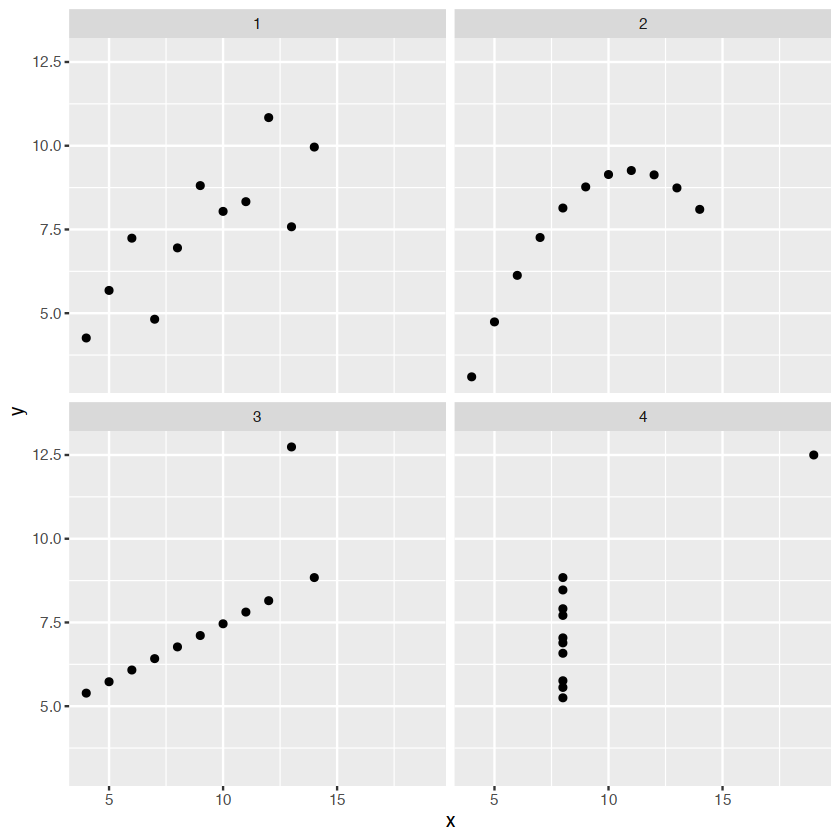

In [49]:
ggplot(obj) + geom_point(aes(x = x, y = y)) + facet_wrap(~Set)